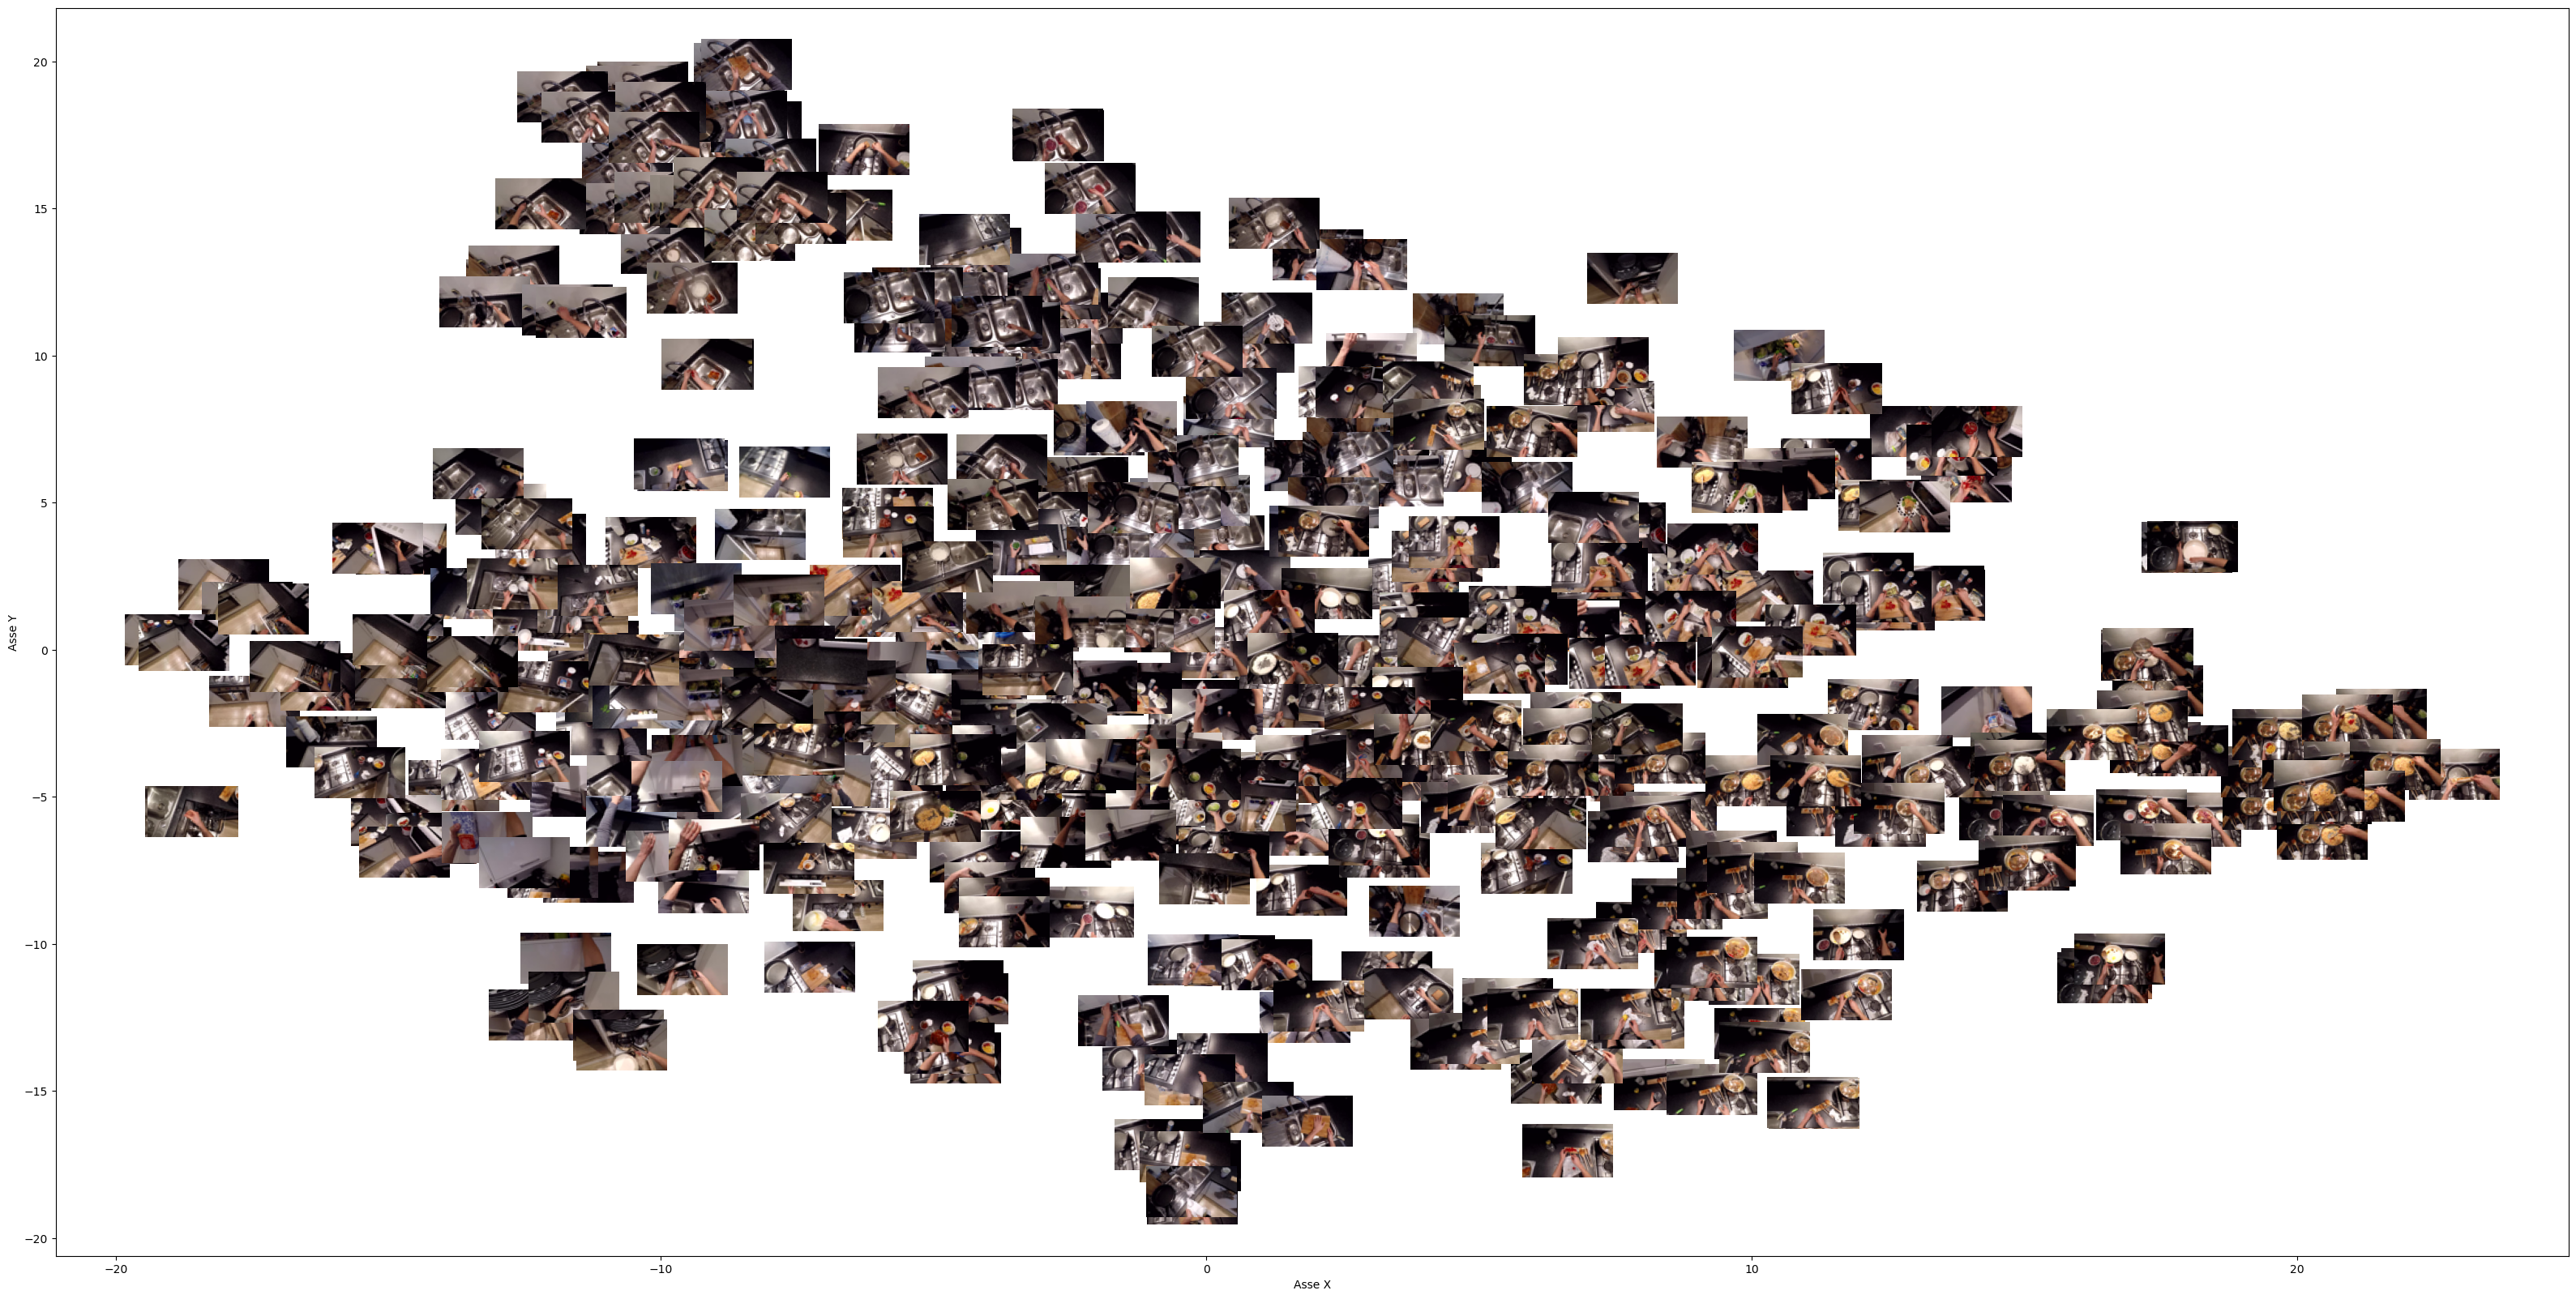

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image




def get_features(features_dict,df)->list:
    """
    Print features stored in a dictionary.
    """
    my_features=[]
                
    selected_images=[]
    
    for _, features in features_dict.items():
        count=0

        for v in features:
            
            feat=v.get("features_RGB")
            my_features.append(feat)

            u_id_to_extract = v.get("uid")

            # Filter DataFrame based on video_id
            filtered_df = df[df['uid'] == u_id_to_extract]
            # Extract unique start_frame and stop_frame values
            start_frames = filtered_df['start_frame'].tolist()
            stop_frames = filtered_df['stop_frame'].tolist()
            central_image=(stop_frames[0]-start_frames[0])//2+ start_frames[0]
            
            # Directory contenente le immagini
            directory = '../ek_data/frames/'+v.get('video_name')
            # Filtra i file nell a directory
            selected_images.append(directory + "/"+ [f for f in os.listdir(directory) if str(central_image) in f][0])
    return my_features,selected_images



def plot_features(path, dataframe):
 
    with open(path, 'rb') as file:
        features_dict = pickle.load(file)

    # Visualize the features
    my_features,selected_images=get_features(features_dict,dataframe)

    #print(len(selected_images))

    aggregated_features=[]
    # Calculate the mean along the first axis (axis=0) to obtain a single vector
    for f in my_features:
        aggregated_features.append(np.mean(f, axis=0))

    # Now 'average_vector' is a 1D array of size 1024 representing the average of the corresponding elements
    """ print("aggregated_featrues",aggregated_features)
    print("Len aggregated featrues", len(aggregated_features))
     """
    """     # Riduci le dimensioni con PCA
    pca = PCA(n_components=2)
    features_reduced = pca.fit_transform(aggregated_features)
    """
    # Definire il modello t-SNE
    tsne = TSNE(n_components=2, random_state=42)

    # Addestrare il modello e trasformare i dati
    features_reduced = tsne.fit_transform(np.array(aggregated_features))


    # Creazione dello scatter plot
    fig, ax = plt.subplots(figsize=(40, 20))

    # Aggiungi gli scatter points
    scatter = ax.scatter(features_reduced[:, 0], features_reduced[:, 1])

    # Aggiungi le immagini come marker
    for x, y, path in zip(features_reduced[:, 0], features_reduced[:, 1], selected_images):
        img = Image.open(path)
        #img = img.resize((40, 40), Image.ANTIALIAS)  # Aumenta la dimensione dell'immagine con anti-aliasing
   
        img.thumbnail((80, 80))  # Imposta le dimensioni dell'immagine del marker
        imagebox = OffsetImage(img, zoom=1)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, xycoords='data', boxcoords="data", pad=0.3)
        ax.add_artist(ab)
        # Imposta i label degli assi
        ax.set_xlabel('Asse X')
        ax.set_ylabel('Asse Y')

    # Aggiungi una legenda se necessario
    # ax.legend()

    # Mostra il plot
    plt.show()

with open('./train_val/D1_test.pkl', 'rb') as file:
        data = pickle.load(file)
        df = pd.DataFrame(data)

       
plot_features('./saved_features_ek/saved_features_5_uniform_D1_test.pkl', df )


# Plotting EMG data


In [149]:
import pandas as pd
pd.read_pickle('mid_level_features/midlevel_feat_25_dense_S04_test.pkl')


{'features': [{'uid': 249,
   'features_RGB': array([[-1.42598063e-01,  2.29197666e-01, -4.65508401e-01,
            1.77063540e-01,  2.47054368e-01,  1.62481189e-01,
           -2.53660470e-01,  4.14839953e-01,  1.33611895e-02,
            3.64848226e-01, -3.69694054e-01, -4.11653906e-01,
            5.09114325e-01,  2.29370713e-01,  1.48073742e-02,
           -3.97298157e-01,  6.93964958e-02, -3.55810165e-01,
            8.65455866e-01,  5.04405677e-01,  7.79539585e-01,
           -1.26663819e-01, -5.83647609e-01,  2.49931425e-01,
            4.37236689e-02, -4.16638881e-01,  7.64074266e-01,
            6.38089776e-02, -3.93166840e-01, -1.35125294e-01,
            1.91935882e-01,  3.14373314e-01,  3.77364680e-02,
            1.40494764e-01, -4.05318290e-01,  5.49240470e-01,
           -2.20565364e-01, -2.06047043e-01, -3.65311414e-01,
           -2.36173049e-01,  1.48077086e-01,  7.45315194e-01,
           -1.46564783e-03,  4.82572287e-01, -8.69213566e-02,
            1.35004193e-01,

In [237]:
'mid_level_features/midlevel_feat_25_dense_S04_test.pkl'
'an_annotations_rgb/S04_test.pkl'

'saved_features_an_multimodal/features_emg_allData_test.pkl'
'an_multimodal_annotations/allData_test.pkl'

'an_multimodal_annotations/allData_test.pkl'

In [44]:
def get_feat_labels(path_data, path_labels):
    with open(path_data, 'rb') as file:
            features_dict = pickle.load(file)
            with open(path_labels, 'rb') as file:
                labels_df = pickle.load(file)
                # Convert dict1 to DataFrame
                
                features_df= pd.DataFrame.from_dict(features_dict['features'])
                # Merge the DataFrames on the 'uid' key
                merged_df = pd.merge(labels_df, features_df, on='uid')
                # Extract the vectors (excluding 'uid' if necessary)
                labels = merged_df['verb_class'].to_numpy()
                
                #features = merged_df['features_EMG'].to_numpy()
                features = merged_df['features_RGB'].to_numpy()

               
                #USE THIS FOR EMG
                """ reshaped_arrays=np.empty((features.shape[0],features[0].shape[0]*features[0].shape[1]))
                # Esegui il reshape per ogni array interno
                for i in range(len(features)):
                    reshaped_arrays[i] = features[i].reshape(features[0].shape[0]*features[0].shape[1])
                     """
                #USE THIS FOR RGB
                reshaped_arrays=[]
                for f in features:
                    reshaped_arrays.append(np.mean(f, axis=0)) 

                return reshaped_arrays,labels
                

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19]


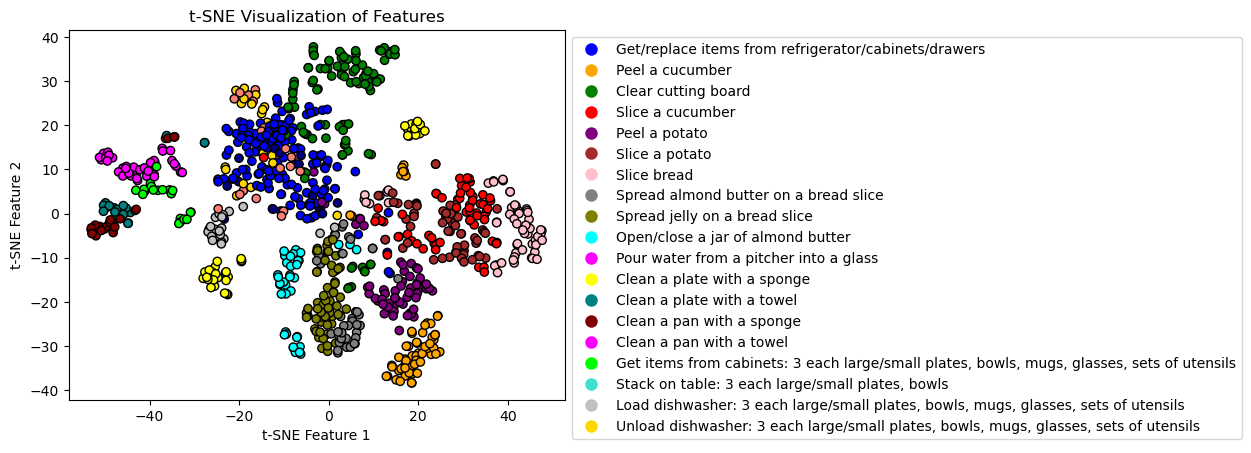

In [45]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

activities_to_classify = [
  'Get/replace items from refrigerator/cabinets/drawers', 
  'Peel a cucumber',
  'Clear cutting board',
  'Slice a cucumber',
  'Peel a potato',
  'Slice a potato',
  'Slice bread',
  'Spread almond butter on a bread slice',
  'Spread jelly on a bread slice',
  'Open/close a jar of almond butter',
  'Pour water from a pitcher into a glass',
  'Clean a plate with a sponge',
  'Clean a plate with a towel',
  'Clean a pan with a sponge',
  'Clean a pan with a towel',
  'Get items from cabinets: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
  'Set table: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
  'Stack on table: 3 each large/small plates, bowls',
  'Load dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
  'Unload dishwasher: 3 each large/small plates, bowls, mugs, glasses, sets of utensils',
]

def plot_features():
    #features, labels=get_feat_labels('saved_features_an/saved_features_an_emg_5s/features_emg_5s_allData_test.pkl','aan_annotations/an_annotations_emg_5s/allData_test.pkl')
    features, labels=get_feat_labels('saved_features_an/saved_features_an_rgb_5s/features_rgb_5_dense_S04_train.pkl','an_annotations/an_annotations_multimodal_5s/S04_train.pkl')
    
    tsne = TSNE(n_components=2, random_state=42)


    # Addestrare il modello e trasformare i dati
    features_reduced = tsne.fit_transform(np.array(features))



    # Assuming 'labels' contains 12 different labels (integers from 0 to 11)

    
    # Create a custom colormap with 12 distinct colors
    cmap = ListedColormap(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow','teal', 'maroon','fuchsia','lime', 'navy', 'turquoise','silver', 'gold', 'salmon'])
    
    # Get unique labels and corresponding descriptions
    unique_labels, unique_descriptions = np.unique(labels, return_index=True)
    
    unique_descriptions = [activities_to_classify[i] for i in unique_labels]
    print(unique_labels)

    # Plot the points with colored labels using the tab20 colormap
    plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=labels, cmap=cmap, edgecolor='k')

    # Create legend handles for each label and its corresponding description
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i),  markersize=10, label=desc) 
                    for i, desc in zip(unique_labels, unique_descriptions)]

    # Add the legend
    plt.legend(handles=legend_handles, loc='best', bbox_to_anchor=(1, 1))
    plt.title('t-SNE Visualization of Features')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')
    plt.show()

plot_features()



